In [73]:
!gsutil -m cp gs://minu-mathew-05262020-aiplatform/application_train.csv .
    


Copying gs://minu-mathew-05262020-aiplatform/application_train.csv...
\ [1/1 files][158.4 MiB/158.4 MiB] 100% Done                                    
Operation completed over 1 objects/158.4 MiB.                                    


In [74]:
import zipfile
zipfile.ZipFile('application_train.zip', mode='w').write("application_train.csv")

In [76]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# TARGET value 0 means loan is repayed, value 1 means loan is not repayed.

In [ ]:
zfile = zipfile.ZipFile('application_train.zip')
zfile.extractall()
zfile.close()

In [77]:
df0 = pd.read_csv("application_train.csv")
df0.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [78]:
df0.columns = [ col.lower() for col in df0.columns ]
#desc = df.describe().transpose()
#print(desc)
#print(df.shape) # (307511, 122)
df0 = df0.set_index( 'sk_id_curr')  # no need for column ID in data analysis.

df0.rename( columns={ "days_birth" : "age",
                      "name_education_type" : "education",
                      "name_housing_type" : "housing",
                      "name_income_type"  : "income",
                      "name_family_status" : "fam_status",
                      "code_gender" : "gender"}, inplace=True)

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [26]:
missing_data(df0).head(20)

,Total,Percent
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_mode,213514,69.432963
nonlivingapartments_medi,213514,69.432963
nonlivingapartments_avg,213514,69.432963
fondkapremont_mode,210295,68.386172
livingapartments_medi,210199,68.354953
livingapartments_mode,210199,68.354953
livingapartments_avg,210199,68.354953


In [27]:
df0.head()

,target,name_contract_type,gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
sk_id_curr,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


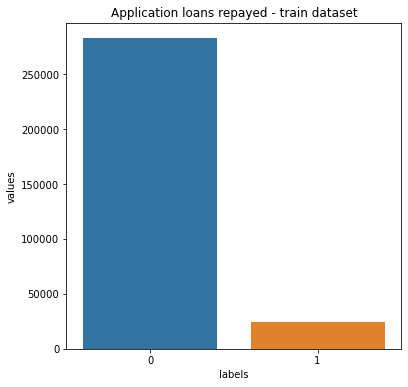

In [28]:
# target value 0 means loan is repayed, value 1 means loan is not repayed.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
temp = df0["target"].value_counts()
df0_target = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df0_target)
locs, labels = plt.xticks()
plt.show()

In [17]:
df0['education'] = ( df0['education'].replace('Secondary / secondary special', 'Secondary')
                                     .replace( 'Higher education', 'Higher') )

In [29]:
df =df0.copy()
del df['organization_type'] # dropped because of too many values
del df['ext_source_1']
del df['ext_source_2']
del df['ext_source_3']
df['flag_own_car'] = df0['flag_own_car'] == 'Y'
df['flag_own_realty'] = df0['flag_own_realty'] == 'Y'

In [35]:
del df['amt_req_credit_bureau_hour']
del df['amt_req_credit_bureau_day']
del df['amt_req_credit_bureau_week']
del df['amt_req_credit_bureau_mon']
del df['amt_req_credit_bureau_qrt']
del df['amt_req_credit_bureau_year']

In [36]:
df.columns.values

array(['target', 'name_contract_type', 'gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_type_suite',
       'income', 'education', 'fam_status', 'housing',
       'region_population_relative', 'age', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'apartments_avg', 'basementarea_avg',
       'years_beginexpluatation_avg', 'years_build_avg', 'commonarea_avg',
       'elevators_avg', 'entrance

In [33]:
# Convert flag columns to bool
for col in df.columns :
    if col.startswith( 'flag_' ) or col.startswith( 'reg_') : 
        df[col] = (df[col] == 1)
        #print( df[col].value_counts() )

In [ ]:
# For float64 columns impute  NaNs with median
# run later
for col in df1.select_dtypes('float64').columns : 
    if df1[col].isnull().sum() > 0 :  
        median = df1[col].median() 
        df1[col] = df1[col].fillna(  median )
# check how well XGBoost handles NaNs

In [57]:
# get all numerical columns names
num_vars = list(df.select_dtypes(include=[np.number]).columns.values)

num_vars.remove('target')
print(num_vars)

['cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative', 'age', 'days_employed', 'days_registration', 'days_id_publish', 'own_car_age', 'cnt_fam_members', 'region_rating_client', 'region_rating_client_w_city', 'hour_appr_process_start', 'live_region_not_work_region', 'live_city_not_work_city', 'apartments_avg', 'basementarea_avg', 'years_beginexpluatation_avg', 'years_build_avg', 'commonarea_avg', 'elevators_avg', 'entrances_avg', 'floorsmax_avg', 'floorsmin_avg', 'landarea_avg', 'livingapartments_avg', 'livingarea_avg', 'nonlivingapartments_avg', 'nonlivingarea_avg', 'apartments_mode', 'basementarea_mode', 'years_beginexpluatation_mode', 'years_build_mode', 'commonarea_mode', 'elevators_mode', 'entrances_mode', 'floorsmax_mode', 'floorsmin_mode', 'landarea_mode', 'livingapartments_mode', 'livingarea_mode', 'nonlivingapartments_mode', 'nonlivingarea_mode', 'apartments_medi', 'basementarea_medi', 'years_beginexpluatation_medi', '

In [38]:
cat_vars = df.dtypes[ df.dtypes == 'object' ]

In [39]:
# TARGET value 0 means loan is repayed, value 1 means loan is not repayed.
def under_sample(input_df, ratio=1.0, random_state=3):
        """Undersamples the majority class(target=0) to reach a ratio by default
            equal to 1 between the majority and minority classes"""
        count_class_0, count_class_1 = input_df["target"].value_counts()
        df_class_0 = input_df[input_df["target"] == 0]
        df_class_1 = input_df[input_df["target"] == 1]
        df_class_0_under = df_class_0.sample(int(ratio * count_class_1), random_state=random_state)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        return df_train_under

In [40]:
df = under_sample(df)

In [41]:
df.shape   # (49650, 111)

(49650, 111)

In [44]:
import df_one_hot_encode
oh_enc = df_one_hot_encode.DfOneHotEncoder( cat_vars.index )

oh_enc.fit( df )
df = oh_enc.transform( df, drop_old=True )

In [58]:
from sklearn import preprocessing
def normalize( df, columns):
        min_max_scaler = preprocessing.MinMaxScaler()
        df[columns] = min_max_scaler.fit_transform(df[columns])
        return df

df= normalize(df, num_vars)

In [61]:
df.head(5)

,target,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,age,...,housetype_mode__terraced_house,wallsmaterial_mode__stone_brick,wallsmaterial_mode__panel,wallsmaterial_mode__block,wallsmaterial_mode__wooden,wallsmaterial_mode__mixed,wallsmaterial_mode__others,wallsmaterial_mode__monolithic,emergencystate_mode__no,emergencystate_mode__yes
sk_id_curr,,,,,,,,,,,,,,,,,,,,,
129994,0,False,True,0.090909,0.000742,0.067511,0.053148,0.049080,0.427871,0.693294,...,False,False,True,False,False,False,False,False,True,False
316354,0,False,True,0.090909,0.000935,0.042038,0.060472,0.035583,0.427871,0.528802,...,True,False,False,False,False,True,False,False,True,False
227544,0,False,True,0.090909,0.001512,0.045158,0.098749,0.049080,0.131615,0.560766,...,False,False,True,False,False,False,False,False,True,False
201655,0,False,False,0.000000,0.000165,0.070606,0.044270,0.050307,0.273887,0.303288,...,False,False,False,False,False,False,False,False,False,False
294076,0,True,True,0.090909,0.000935,0.060276,0.129459,0.056442,0.266148,0.652214,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# split into train val and test
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
train, test = train_test_split( df, train_size = 0.8, test_size = 0.2 )
print(train.shape, test.shape) #(39720, 175) (9930, 175)

(39720, 175) (9930, 175)


In [63]:
train = shuffle(train)
partial_train = train[:31776]
val=train[31776:]
print(partial_train.shape, val.shape, test.shape)     # (31776, 175) (7944, 175) (9930, 175)

(31776, 175) (7944, 175) (9930, 175)


In [69]:
y_train = partial_train['target']
y_val = val['target']
y_test  = test['target']

x_train = partial_train.loc[ : , partial_train.columns != 'target']
x_val =  val.loc[:,val.columns!='target']
x_test  = test .loc[ : , test.columns != 'target']
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)    
#(31776, 174) (7944, 174) (9930, 174) (31776,) (7944,) (9930,)

(31776, 174) (7944, 174) (9930, 174) (31776,) (7944,) (9930,)


In [70]:
x_train.to_hdf('x_train.h5', key='df', mode='w')
y_train.to_hdf('y_train.h5', key='df', mode='w')
x_val.to_hdf('x_val.h5', key='df', mode='w')
y_val.to_hdf('y_val.h5', key='df', mode='w')
x_test.to_hdf('x_test.h5', key='df', mode='w')
y_test.to_hdf('y_test.h5', key='df', mode='w')